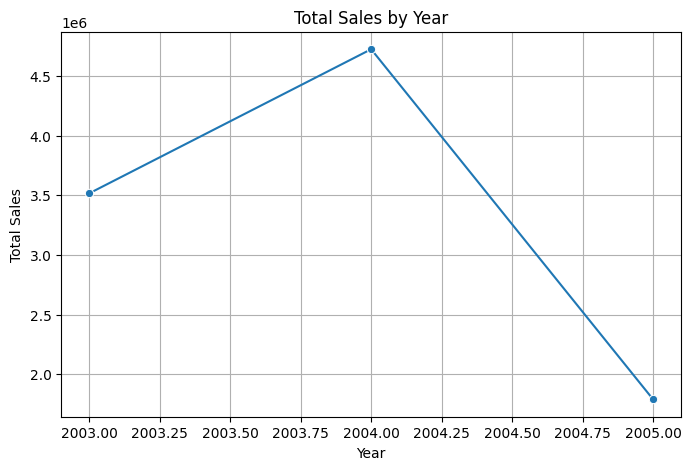

/tmp/ipython-input-752143309.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_product.values, y=sales_product.index, palette="viridis")


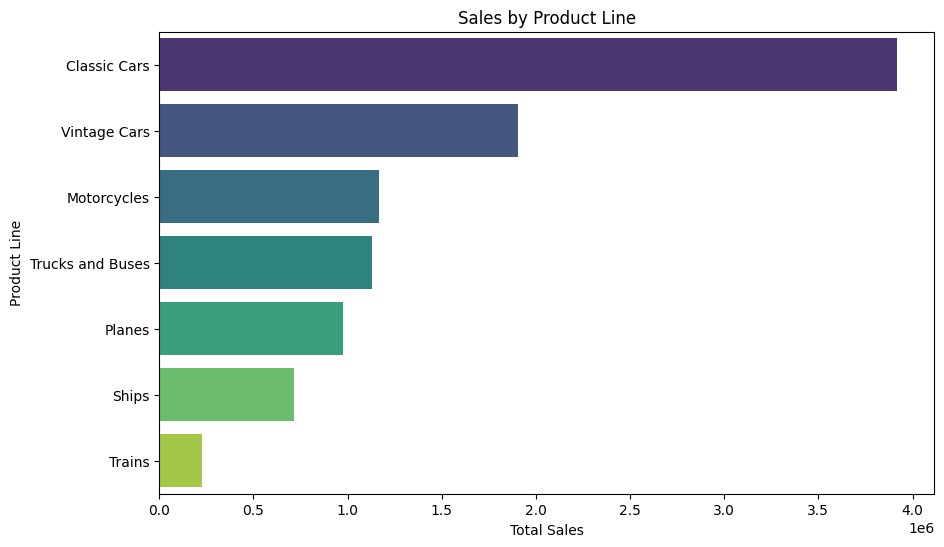

/tmp/ipython-input-752143309.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="magma")


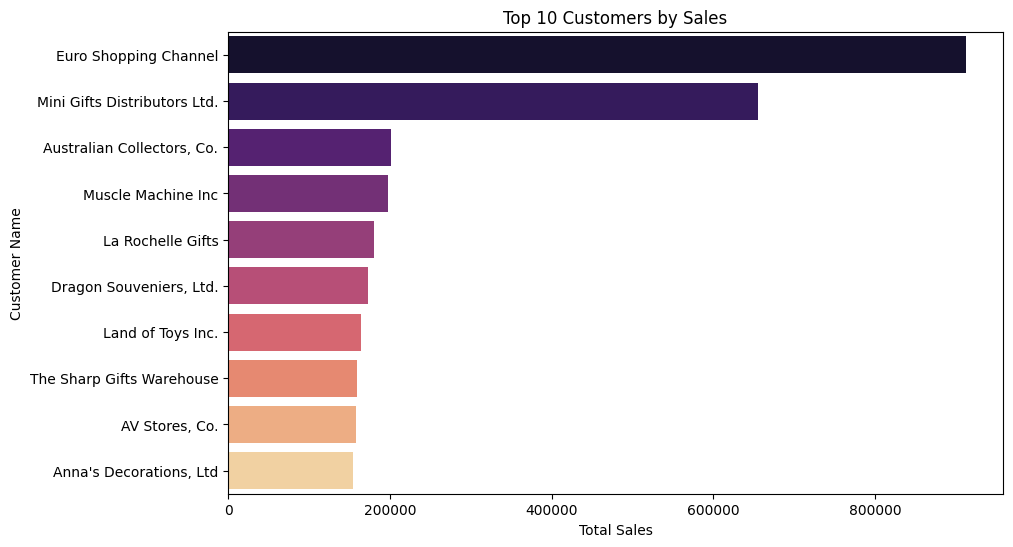

/tmp/ipython-input-752143309.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_country.values, y=sales_country.index, palette="coolwarm")


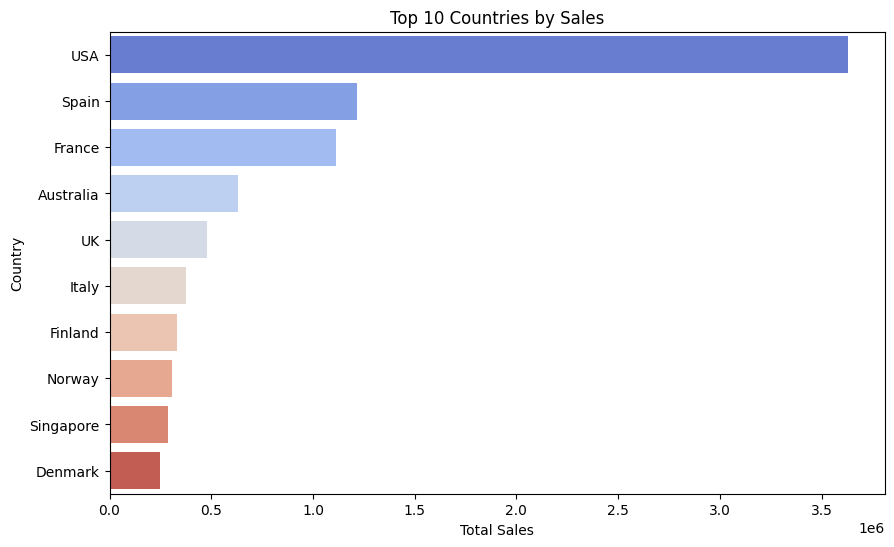

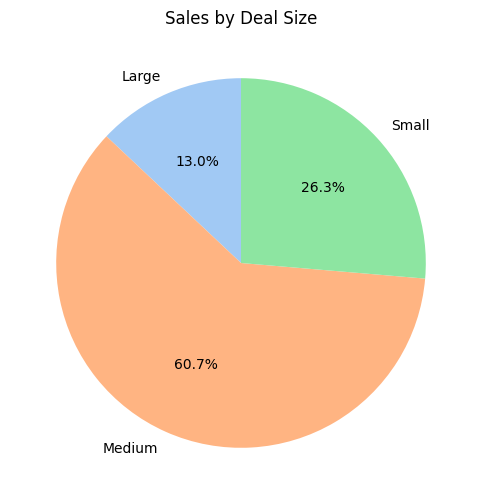

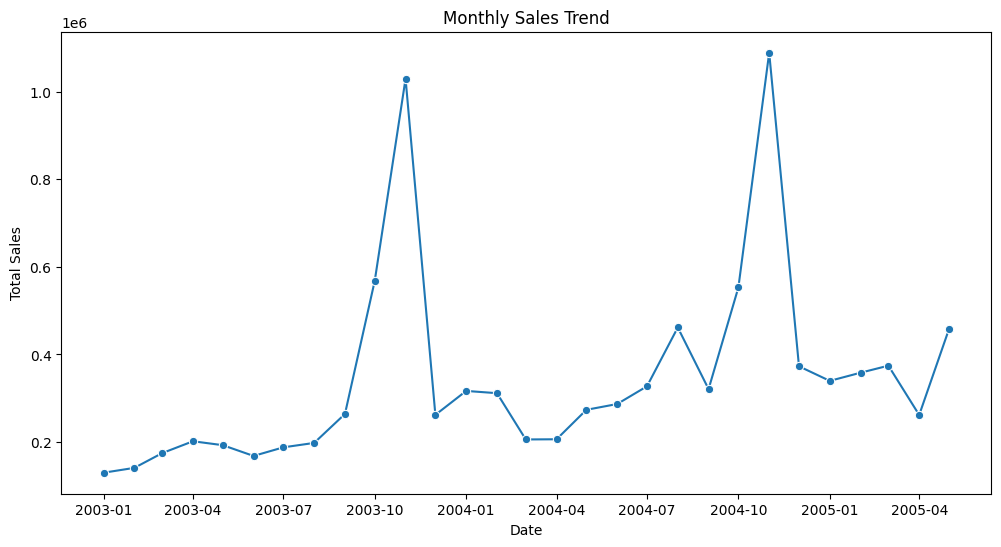

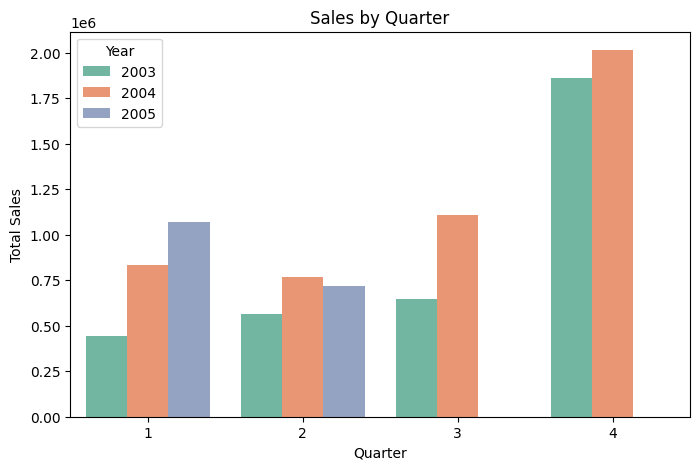

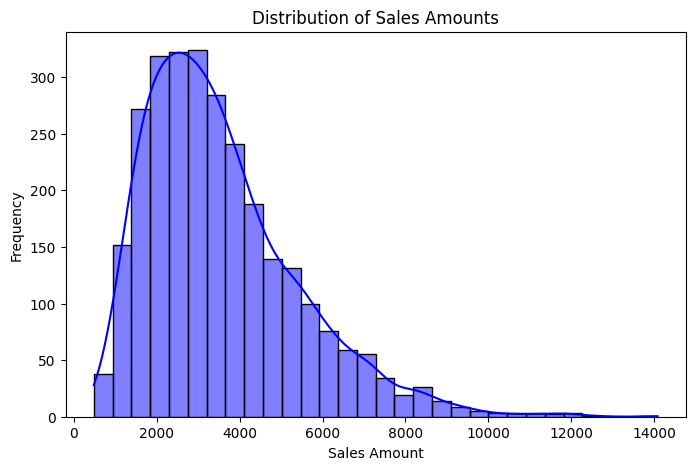

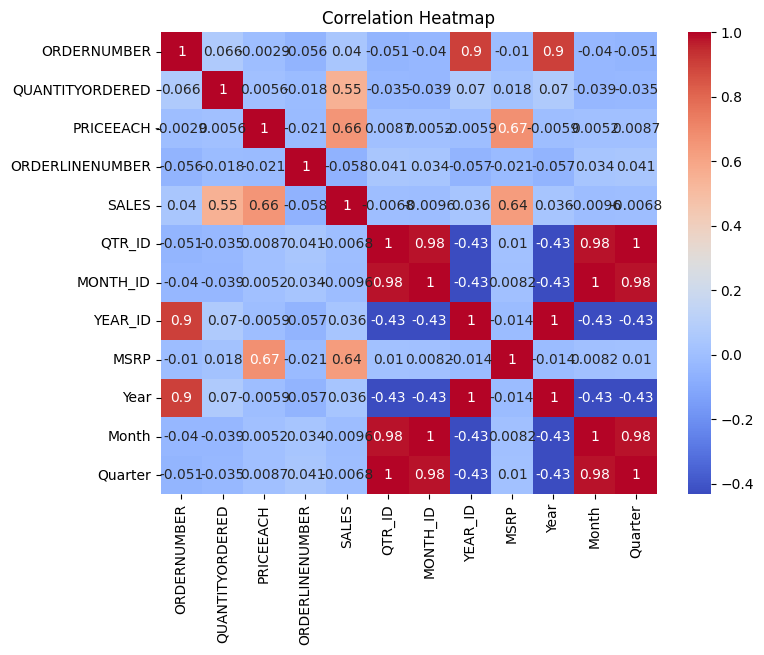

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ All 9 datasets exported successfully. You can now import them into Power BI.


In [ ]:
#  Sales Dashboard

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
df = pd.read_csv("/content/sales_data_sample.csv", encoding='latin1')

# Step 3: Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Extract Year, Month, and Quarter
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Quarter'] = df['ORDERDATE'].dt.quarter

# -----------------------------
# Visualization 1: Total Sales by Year
# -----------------------------
sales_year = df.groupby("Year")["SALES"].sum()

plt.figure(figsize=(8,5))
sns.lineplot(x=sales_year.index, y=sales_year.values, marker="o")
plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# -----------------------------
# Visualization 2: Sales by Product Line
# -----------------------------
sales_product = df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=sales_product.values, y=sales_product.index, palette="viridis")
plt.title("Sales by Product Line")
plt.xlabel("Total Sales")
plt.ylabel("Product Line")
plt.show()

# -----------------------------
# Visualization 3: Top 10 Customers by Sales
# -----------------------------
top_customers = df.groupby("CUSTOMERNAME")["SALES"].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="magma")
plt.title("Top 10 Customers by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Customer Name")
plt.show()

# -----------------------------
# Visualization 4: Sales by Country
# -----------------------------
sales_country = df.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=sales_country.values, y=sales_country.index, palette="coolwarm")
plt.title("Top 10 Countries by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.show()

# -----------------------------
# Visualization 5: Sales by Deal Size
# -----------------------------
sales_dealsize = df.groupby("DEALSIZE")["SALES"].sum()

plt.figure(figsize=(6,6))
plt.pie(sales_dealsize.values, labels=sales_dealsize.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Sales by Deal Size")
plt.show()

# -----------------------------
# Visualization 6: Monthly Sales Trend
# -----------------------------
monthly_sales = df.groupby(["Year", "Month"])["SALES"].sum().reset_index()
monthly_sales["Date"] = pd.to_datetime(monthly_sales["Year"].astype(str) + "-" + monthly_sales["Month"].astype(str) + "-01")

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="Date", y="SALES", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# -----------------------------
# Visualization 7: Sales by Quarter
# -----------------------------
sales_quarter = df.groupby(["Year", "Quarter"])["SALES"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=sales_quarter, x="Quarter", y="SALES", hue="Year", palette="Set2")
plt.title("Sales by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.show()

# -----------------------------
# Visualization 8: Sales Distribution (Histogram)
# -----------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["SALES"], bins=30, kde=True, color="blue")
plt.title("Distribution of Sales Amounts")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

# -----------------------------
# Visualization 9: Correlation Heatmap
# -----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Export all datasets used for charts in the Sales Dashboard

from google.colab import files

# 1. Total Sales by Year
sales_year = df.groupby("Year")["SALES"].sum().reset_index()
sales_year.to_csv("sales_year.csv", index=False)
files.download("sales_year.csv")

# 2. Sales by Product Line
sales_product = df.groupby("PRODUCTLINE")["SALES"].sum().reset_index().sort_values("SALES", ascending=False)
sales_product.to_csv("sales_product.csv", index=False)
files.download("sales_product.csv")

# 3. Top 10 Customers by Sales
top_customers = df.groupby("CUSTOMERNAME")["SALES"].sum().reset_index().nlargest(10, "SALES")
top_customers.to_csv("top_customers.csv", index=False)
files.download("top_customers.csv")

# 4. Sales by Country (Top 10)
sales_country = df.groupby("COUNTRY")["SALES"].sum().reset_index().sort_values("SALES", ascending=False).head(10)
sales_country.to_csv("sales_country.csv", index=False)
files.download("sales_country.csv")

# 5. Sales by Deal Size
sales_dealsize = df.groupby("DEALSIZE")["SALES"].sum().reset_index()
sales_dealsize.to_csv("sales_dealsize.csv", index=False)
files.download("sales_dealsize.csv")

# 6. Monthly Sales Trend
monthly_sales = df.groupby(["Year", "Month"])["SALES"].sum().reset_index()
monthly_sales.to_csv("monthly_sales.csv", index=False)
files.download("monthly_sales.csv")

# 7. Sales by Quarter
sales_quarter = df.groupby(["Year", "Quarter"])["SALES"].sum().reset_index()
sales_quarter.to_csv("sales_quarter.csv", index=False)
files.download("sales_quarter.csv")

# 8. Sales Distribution (Histogram) - Export raw SALES column
sales_distribution = df[["SALES"]]
sales_distribution.to_csv("sales_distribution.csv", index=False)
files.download("sales_distribution.csv")

# 9. Correlation Heatmap - Export correlation matrix
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix.to_csv("correlation_matrix.csv")
files.download("correlation_matrix.csv")

print(" All 9 datasets exported successfully. now import them into Power BI.")
